In [36]:
import numpy as np
np.random.seed(42)

In [37]:
np.random.uniform(size=50)*5

array([1.87270059, 4.75357153, 3.65996971, 2.99329242, 0.7800932 ,
       0.7799726 , 0.29041806, 4.33088073, 3.00557506, 3.54036289,
       0.10292247, 4.84954926, 4.1622132 , 1.06169555, 0.90912484,
       0.91702255, 1.52121121, 2.62378216, 2.15972509, 1.4561457 ,
       3.05926447, 0.6974693 , 1.46072324, 1.83180922, 2.28034992,
       3.92587981, 0.99836891, 2.57117219, 2.96207284, 0.23225206,
       3.03772426, 0.85262062, 0.32525796, 4.74442769, 4.82816017,
       4.04198674, 1.52306885, 0.48836057, 3.42116513, 2.20076247,
       0.61019117, 2.47588455, 0.17194261, 4.54660201, 1.29389991,
       3.31261142, 1.55855538, 2.60034011, 2.7335514 , 0.92427228])

In [38]:
## 정답 데이터 생성
X=np.random.uniform(size=50)*5 #0~5 사이의 난수를 생성
y=0.65*X**3-4*X**2+3*X+3+np.random.normal(scale=0.6,size=50)  #정규 분포에서 추출, scale = 표준편차

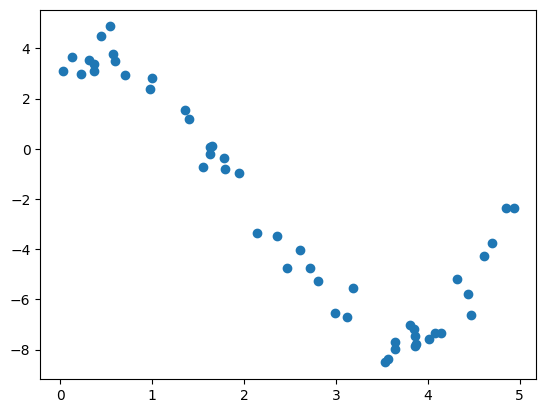

In [39]:
# 정답 데이터를 산점도로 출력
import matplotlib.pyplot as plt
plt.scatter(X,y)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True)  # test 비율 40%  # shuffle = 순서대로 아니라 섞어서 추출
# 전체 데이터를 6:4 (훈련:테스트)

In [41]:
print(f'X_train: {X_train.shape}') #f스트링, 문자열과 변수값을 합쳐서 사용
print(f'y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')
X_train.shape
X_train
y_train

X_train: (30,)
y_train: (30,)
X_test: (20,)
y_test: (20,)


array([-5.55037815, -0.20740815,  3.08286413,  3.76429632, -5.77960365,
       -8.51526921, -0.95680671, -2.35397863, -0.71392633, -7.5719711 ,
        3.52560261,  2.39946691,  4.870632  ,  4.48733613, -6.72101386,
       -8.39355282, -3.47909835, -7.0044784 , -7.9835815 ,  3.36087983,
        0.08130486, -2.37396649, -3.74119473, -0.82701472,  3.67012242,
       -4.28696775,  2.99627907,  0.11243401, -4.74373642, -3.35737607])

In [42]:
# np.argsort(1,2,3)

a = np.array([1.5, 0.2, 4.2, 2.5])
s = a.argsort()

print(s)
print(a[s])

[1 0 3 2]
[0.2 1.5 2.5 4.2]


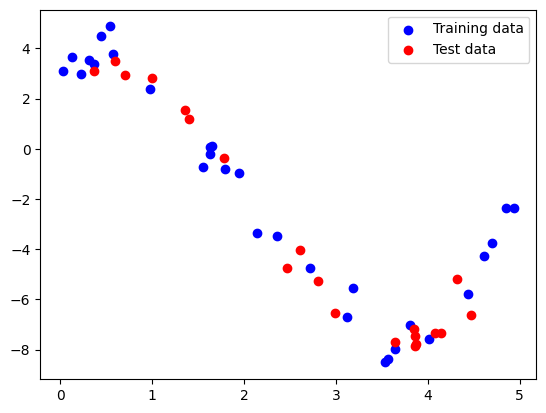

In [43]:
## 훈련데이터와 테스팅 데이터 그려보기
import numpy as np
import matplotlib.pyplot as plt

## X,y 데이터를 X기준으로 모두 정렬
## 나중에 사용됨

# Sort the y_train and y_test arrays based on the sorted X_train and X_test arrays
# argsort()는 배열 a의 원소를 정렬한 후 해당 원소의 인덱스를 반환
y_train = y_train[np.argsort(X_train)] # [3,1,2] -> argsort -> [1,2,0]
y_test = y_test[np.argsort(X_test)]

# Sort the training and test arrays
X_train = np.sort(X_train)
X_test = np.sort(X_test)

# Plot the sorted training and test data
plt.scatter(X_train, y_train, c='blue', label='Training data')
plt.scatter(X_test, y_test, c='red', label='Test data')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [44]:
y_test

array([ 3.11402646,  3.48178887,  2.9340625 ,  2.82613431,  1.52779161,
        1.18136245, -0.37887348, -4.73926635, -4.03682301, -5.26623965,
       -6.54537455, -7.69578312, -7.16665425, -7.84516927, -7.45618908,
       -7.79544699, -7.34766596, -7.32136002, -5.17544021, -6.62589638])

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# degree : 차수
# graph : 그래프 그릴지 여부 결정

def plot_regressor(degree, graph=True): 
    
    ## 모델 생성
    reg = LinearRegression()
    
    ## 데이터 변환
    poly = PolynomialFeatures(degree = degree, include_bias=False)    
    X_train_ = poly.fit_transform(X_train.reshape(-1,1)) # 데이터가 1차원이라 reshape 사용      
    # 최적 데이터 차원 찾기위해 / 다항회귀분석 위해 poly 변환 사용 
    
    ## 모델 학습    
    reg.fit(X_train_, y_train)
    
    ## 예측값
    y_pred_train = reg.predict(X_train_)
    
    ## 그래프 그리기
    if graph:
        plt.scatter(X_train,y_train,c='blue',label='training')
        plt.scatter(X_test,y_test,c='red',label='testing')    
        plt.plot(X_train,y_pred_train,color='blue') # 훈련데이터를 얼마나 잘 나타내는지 표현하기 위해 선형도 작성
        plt.legend() # 범례 표시
    
    ## 트레이닝 데이터와 테스팅 데이터 각각의 MSE 계산
    X_test_ = poly.fit_transform(X_test.reshape(-1,1))
    y_pred_test = reg.predict(X_test_)
    train_mse = mean_squared_error(y_train,y_pred_train) # 훈련 데이터의 MSE
    test_mse = mean_squared_error(y_test,y_pred_test) # 테스팅 데이터의 MSE
    print(f'training MSE: {train_mse}')
    print(f'testing MSE:{test_mse}')
    
    return train_mse, test_mse
    
    
    

training MSE: 5.436716546752774
testing MSE:3.613602326509092


(5.436716546752774, 3.613602326509092)

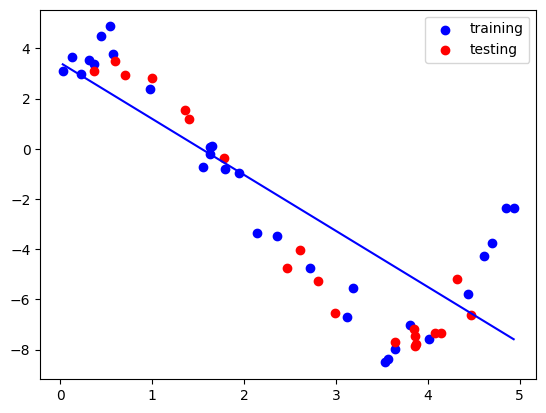

In [46]:

plot_regressor(1)

training MSE: 2.7457343368262985
testing MSE:2.554202530023699


(2.7457343368262985, 2.554202530023699)

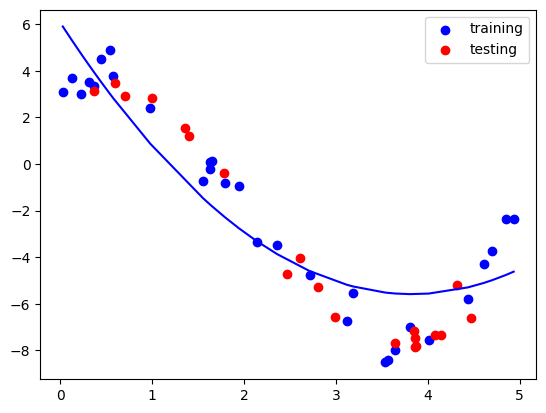

In [47]:
plot_regressor(2)

training MSE: 0.3412336538952888
testing MSE:0.250896204971928


(0.3412336538952888, 0.250896204971928)

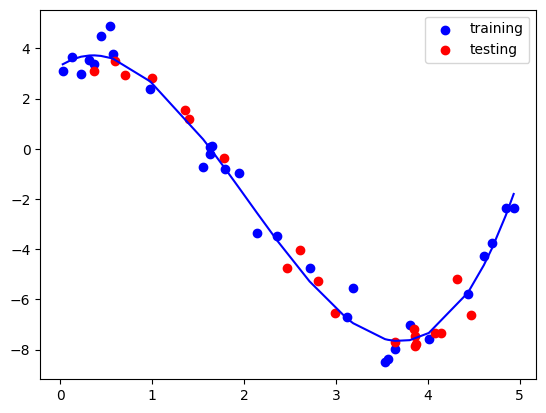

In [48]:

plot_regressor(3)

training MSE: 0.2671087422602236
testing MSE:0.37648213845707823


(0.2671087422602236, 0.37648213845707823)

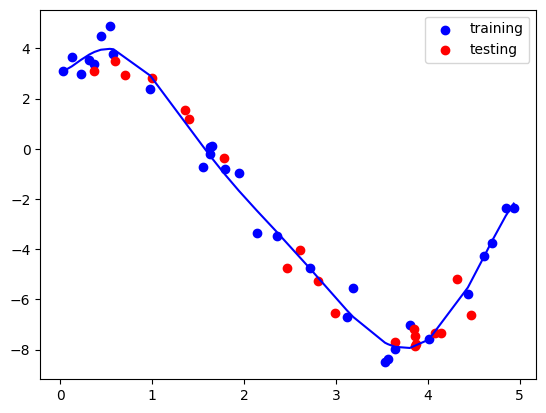

In [49]:
plot_regressor(8)

training MSE: 0.17342104218168022
testing MSE:0.7088482374751444


(0.17342104218168022, 0.7088482374751444)

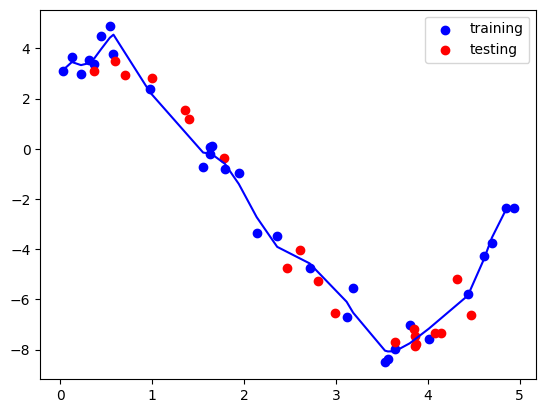

In [50]:
plot_regressor(15)

==========1==========
training MSE: 5.436716546752774
testing MSE:3.613602326509092
==========2==========
training MSE: 2.7457343368262985
testing MSE:2.554202530023699
==========3==========
training MSE: 0.3412336538952888
testing MSE:0.250896204971928
==========4==========
training MSE: 0.3388337671563237
testing MSE:0.2627581024074693
==========5==========
training MSE: 0.33065213306736274
testing MSE:0.26898588791826694
==========6==========
training MSE: 0.2903099581854326
testing MSE:0.331233664775596
==========7==========
training MSE: 0.2701259502535172
testing MSE:0.3708950220365176
==========8==========
training MSE: 0.2671087422602236
testing MSE:0.37648213845707823
==========9==========
training MSE: 0.2623916296064652
testing MSE:0.3877493573535567
==========10==========
training MSE: 0.257031418730992
testing MSE:0.4114636675817285
==========11==========
training MSE: 0.2416104842494248
testing MSE:0.36999697359451766
==========12==========
training MSE: 0.204623875652313

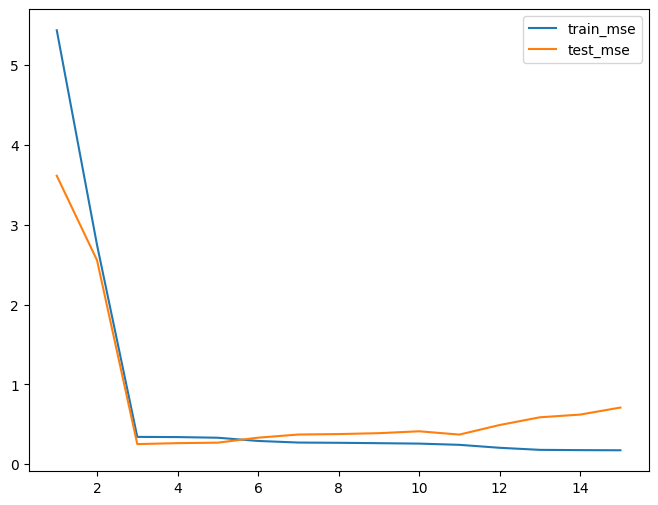

In [51]:
train_mse = []
test_mse = []
degrees = range(1,16)

for i in degrees:
    print("="*10+str(i)+"="*10)
    train, test = plot_regressor(i,graph=False)
    train_mse.append(train)
    test_mse.append(test)

plt.figure(figsize=(8,6))
plt.plot(degrees,train_mse, label = 'train_mse')
plt.plot(degrees,test_mse, label = 'test_mse')
plt.legend()